# Welcome to the Battery.py Demonstration Notebook!

This notebook will walk you through using battery.py, and show a few different use cases where the model can be used to fit experimental data.

In order to begin, we will need to parametrize the model and select a model. This was done above with the line: 

```python
from battery import SingleParticle```

by hitting shift-tab while attempting to parametrize the model, we can view the docstring, which will tell us how to use the models.

The model will start with reasonable defaults, but we can choose different defaults if we wish, by initializing a dictionary of all of the 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from battery import SingleParticleParabolic, SingleParticleFDSEI, SingleParticleFD

### This notebook explores the Single Particle Model (SPM)

The SPM examines various physical phenomena, including:
* Solid phase diffusion in the spherical particles, as given by Fick's law:

$\frac{\partial c_{s}}{\partial t} = \frac{D_s}{r^2}\frac{\partial}{\partial r}(r^2 \frac{\partial c}{\partial r})$


* Reaction kinetics, as described by Butler-Volmer:

$x_{surf} = \frac{c_{surf}}{c_max} $

$j = kc_{s,max}c^{0.5}_{e}(1-x_{surf})^{0.5}x_{surf}^{0.5}[exp(\frac{0.5 F}{RT}\eta)-exp(-\frac{0.5 F}{RT}\eta)]$

* Solid-phase potential, as dictated by the surface concentration at the particles

$\eta = \phi(x_{surf})-U$

* The available parameters are as follows:

| name   | description                                 | default value | Units   |
|--------|---------------------------------------------|---------------|---------|
| Dn     | Li+ Diffusivity in negative particle        | 3.9e-14       | m^2/s  |
| Dp     | Li+ Diffusivity in positive particle        | 1e-14         | m^2/s  |
| Rn     | Negative particle radius                    | 2e-6          | m       |
| Rp     | Positive particle radius                    | 2e-6          | m       |
| T      | Ambient Temperature                         | 303.15        | K       |
| an     | Surface area per unit volume of negative electrode          | 723600        |   m^2/m^3      |
| ap     | Surface area per unit volume of positive electrode          | 885000        |    m^2/m^3     |
| ce     | Starting electrolyte Li+ concentration      | 1000          | mol/m^3 |
| csnmax | Maximum Li+ concentration of negative solid | 30555         | mol/m^3 |
| cspmax | Maximum Li+ concentration of positive solid | 51555         | mol/m^3 |
| kn     | Negative electrode reaction rate            | 5.0307e-9     | m^4/mol s        |
| kp     | Positive electrode reaction rate            | 2.334e-9      |   m^4/mol s      |
| ln     | Negative electrode thickness                | 88e-6         | m       |
| lp     | Positive electrode thickness                | 80e-6         | m       |


In [2]:
labels = ['Dn','Dp','Rn','Rp','T','an','ap','ce','csnmax','cspmax','kn','kp','ln','lp']
values = [3.9e-14, 1e-14, 2e-6, 2e-6, 303.15, 723600, 885000, 1000, 30555, 51555, 5.0307e-9, 2.334e-9, 88e-6, 80e-6]
p1 = dict(zip(labels, values))

spm1 = SingleParticleFD()
print(spm1.initial_parameters)
# print(spm1.estimate_inds)

{'Dp': 1e-14, 'Dn': 1e-14, 'cspmax': 51555.0, 'csnmax': 30555.0, 'lp': 8e-05, 'ln': 8.8e-05, 'Rp': 2e-06, 'Rn': 2e-06, 'T': 303.15, 'ce': 1000.0, 'ap': 885000.0, 'an': 723600.0, 'kp': 2.334e-11, 'kn': 8.307e-12, 'N1': 30, 'N2': 30}


### Traditional fitting approach:
* acquire experimental data
* select model
* solve model 
* select optimizer
* interface model and optimizer
* repeatedly call until the fits look about right
* put into plotting software
* optional analysis: confidence intervals, fitting only select parameters

In [3]:
# p = [3.9e-14, 1e-14, 2e-06, 2e-06, 303.15, 723600.0, 885000.0, 1000.0, 30550.0, 51555.0, 5.0307e-09, 2.334e-09, 8.8e-05, 8e-05, 1.0, 1]
# cc = [1]
# tf = [5000.]
# initial = [49503.0611, 305.605527, 49327.3985, 355.685791, 3.78436346, 0.786330739, 1.0]
# input1 = np.concatenate([p,cc,tf])
# print(input1.shape)
# a = np.array([1,2,3,4,5])
# b = np.array([2,3,4,5,6])
# c = np.concatenate([a.reshape(-1,1),b.reshape(-1,1)], axis=1)
# print(c)

# a = np.random.rand(15,20)
# print(a[:,[-1,-2]])
# print(a[:,[-2,-1]])
# print(a[:,-1], a[:,-2])
# aa = [1e-14, 1e-14, 51555.0, 30555.0, 8e-05, 8.8e-05, 2e-06, 2e-06, 303.15, 1000.0, 885000.0, 723600.0, 0.026, 2100.0, 1.0, 2.334e-11, 8.307e-12, 1.5e-06, 30.0, 30.0, 1.0, 1]
# print(aa[20])
# input1=[ 1.00000000e-14,1.00000000e-14,5.15550000e+04,3.05550000e+04
# ,8.00000000e-05,8.80000000e-05,2.00000000e-06,2.00000000e-06
# ,3.03150000e+02,1.00000000e+03,8.85000000e+05,7.23600000e+05
# ,2.60000000e-02,2.10000000e+03,1.00000000e+00,2.33400000e-11
# ,8.30700000e-12,1.50000000e-06,3.00000000e+01,3.00000000e+01
#  -5.00000000e-01,1.00000000e+00,0.00000000e+00,8.00000000e+03
# ,4.26700382e+00,6.70038247e-02,2.65295200e-03,7.34704800e-03
# ,1.63513920e-10,3.08271510e+01,3.08183958e+01,8.75512593e-03
# ,4.20000000e+00,1.00000000e-02]
# print(len(input1))

In [4]:
print(spm1.discharge_ICs)

[25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 25817.37, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 26885.03, 4.246347, 0.046347, 4.2, 0.01]


[array([[0.00000000e+00, 2.90078101e+00, 5.00000000e-01],
       [1.00000000e+01, 3.12447819e+00, 5.00000000e-01],
       [2.00000000e+01, 3.19593522e+00, 5.00000000e-01],
       ...,
       [8.45105827e+03, 4.20000000e+00, 3.56428983e-04],
       [8.46105827e+03, 4.20000000e+00, 3.35999217e-04],
       [8.46240312e+03, 4.20000000e+00, 3.33333333e-04]]), array([1.23134485e+03, 2.51420914e+04, 2.51420912e+04, 2.51420906e+04,
       2.51420896e+04, 2.51420883e+04, 2.51420865e+04, 2.51420844e+04,
       2.51420819e+04, 2.51420790e+04, 2.51420758e+04, 2.51420722e+04,
       2.51420682e+04, 2.51420638e+04, 2.51420592e+04, 2.51420541e+04,
       2.51420488e+04, 2.51420431e+04, 2.51420371e+04, 2.51420308e+04,
       2.51420242e+04, 2.51420173e+04, 2.51420101e+04, 2.51420026e+04,
       2.51419949e+04, 2.51419870e+04, 2.51419788e+04, 2.51419703e+04,
       2.51419617e+04, 2.51419529e+04, 2.51419438e+04, 2.51419346e+04,
       2.51419253e+04, 2.73917131e+04, 2.73917133e+04, 2.73917139e+04,
    

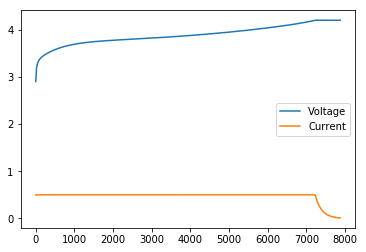

In [5]:
import time
# st = time.time()
# for i in range(50):
data = spm1.charge(current=0.5, trim=True
# print(data.curr)
# print(spm1.current_state)
# data = spm1.discharge(current=1.0, trim=True, from_current_state=True)
# print((time.time()-st)/50)
plt.plot(data[0], data[1], label = 'Voltage')
plt.plot(data[0], data[2], label = 'Current')
plt.legend()

{'Dp': 1e-14, 'Dn': 1e-14, 'cspmax': 51555.0, 'csnmax': 30555.0, 'lp': 8e-05, 'ln': 8.8e-05, 'Rp': 2e-06, 'Rn': 2e-06, 'T': 303.15, 'ce': 1000.0, 'ap': 885000.0, 'an': 723600.0, 'M_sei': 0.026, 'rho_sei': 2100.0, 'Kappa_sei': 1.0, 'kp': 2.334e-11, 'kn': 8.307e-12, 'ksei': 1.5e-06, 'N1': 30, 'N2': 30}
{'Dp': 1e-14, 'Dn': 1e-14, 'cspmax': 51555.0, 'csnmax': 30555.0, 'lp': 7.8e-05, 'ln': 8.8e-05, 'Rp': 2e-06, 'Rn': 2e-06, 'T': 303.15, 'ce': 1000.0, 'ap': 885000.0, 'an': 723600.0, 'M_sei': 0.026, 'rho_sei': 2100.0, 'Kappa_sei': 1.0, 'kp': 2.334e-09, 'kn': 8.307e-12, 'ksei': 1.5e-06, 'N1': 30, 'N2': 30}


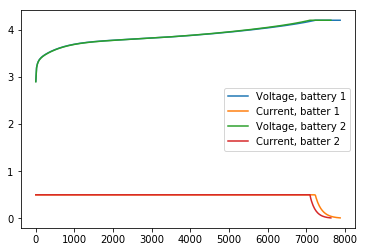

In [6]:
# generate experimental data with some set of parameters

labels = ['Rp','lp','kp']
values = [2.0e-6, 78e-6,2.334e-9]
p1 = dict(zip(labels, values))
# print(p1)

bounds = [[1e-7,1e-5],[1e-7,1e-5],[1e-10,1e-8]]
spm2 = SingleParticleFDSEI(initial_parameters=p1, estimate_parameters=['Rp','lp','kp'])
print(spm1.initial_parameters)
print(spm2.initial_parameters)

# create the experimental data
data = spm1.charge(current=0.5, trim=True)
data2 = spm2.charge(current=0.5, trim=True)
t_exp = data[0]
v_exp = data[1]
curr_exp = data[2]

plt.plot(t_exp, v_exp, label='Voltage, battery 1')
plt.plot(t_exp, curr_exp, label='Current, batter 1')
plt.plot(data2[0], data2[1], label='Voltage, battery 2')
plt.plot(data2[0], data2[2], label='Current, batter 2')

plt.legend()

In [7]:
spm2.fit([t_exp], [v_exp], currents=[-0.5], bounds=bounds, method='Nelder-Mead', maxiter=100, tol=1e-7)
# spm2.refit()

C:\Users\neal\Anaconda3\envs\keras\lib\site-packages\scipy\optimize\_minimize.py:430: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190


 final_simplex: (array([[5.80444522e-05, 2.74884092e-06, 1.75943571e-09],
       [5.94933370e-05, 2.68301802e-06, 1.81233088e-09],
       [5.96462371e-05, 2.67478445e-06, 1.81436728e-09],
       [5.88087801e-05, 2.71021457e-06, 1.78850463e-09]]), array([0.00225612, 0.00232827, 0.00233281, 0.00233492]))
           fun: 0.0022561199460950235
       message: 'Maximum number of iterations has been exceeded.'
          nfev: 191
           nit: 100
        status: 2
       success: False
             x: array([5.80444522e-05, 2.74884092e-06, 1.75943571e-09])

In [8]:
true_values = np.array([3.9e-14, 1e-14, 2e-6, 2e-6, 303.15, 723600, 885000, 1000, 30555, 51555, 5.0307e-9, 2.334e-9, 88e-6, 80e-6])

In [9]:
error = (spm2.fitted_parameters-true_values[spm2.estimate_inds])/true_values[spm2.estimate_inds]*100
print("Percent error for the estimated parameters:")
print(np.array([key for key in spm2.initial_parameters.keys()])[spm2.estimate_inds])
print(error)

IndexError: index 15 is out of bounds for axis 0 with size 14

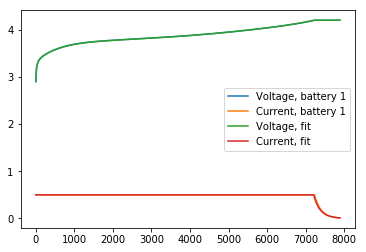

In [10]:
fit_data = spm2.charge(current=0.5, trim=True)
plt.plot(t_exp, v_exp, label='Voltage, battery 1')
plt.plot(t_exp, curr_exp, label='Current, battery 1')
plt.plot(fit_data[0], fit_data[1], label='Voltage, fit')
plt.plot(fit_data[0], fit_data[2], label='Current, fit')

plt.legend()

### What about fitting 2 simultaneous currents?

[array([[ 0.00000000e+00,  1.60320641e+01,  3.20641283e+01, ...,
         7.35871743e+03,  7.37474950e+03,  7.39078156e+03],
       [ 4.19387361e+00,  4.19069351e+00,  4.18757687e+00, ...,
         3.04197477e+00,  2.90632929e+00,  2.67766490e+00],
       [-5.00000000e-01, -5.00000000e-01, -5.00000000e-01, ...,
        -5.00000000e-01, -5.00000000e-01, -5.00000000e-01]]), array([[0.00000000e+00, 1.00200401e+01, 2.00400802e+01, ...,
        3.76753507e+03, 3.77755511e+03, 3.78757515e+03],
       [2.96048606e+00, 3.10293235e+00, 3.18816153e+00, ...,
        4.20000000e+00, 4.20000000e+00, 4.20000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.27858538e-02, 1.52511435e-02, 1.02055092e-02]])]


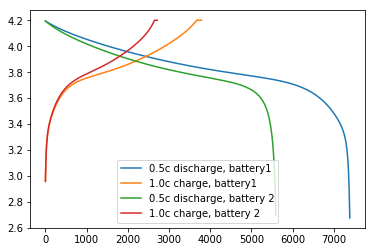

In [9]:
a = []
a.append(spm1.discharge(current=0.5, trim=True))
a.append(spm1.charge(current=1.0, trim=True))

# re-initialize battery 2 in order to reset the initial guess
spm2 = SingleParticle(initial_parameters=p1, estimate_parameters=['Rp','lp'])
b = []
b.append(spm2.discharge(current=0.5, trim=True))
b.append(spm2.charge(current=1.0, trim=True))
print(a)
t_exp = [a[0][0], a[1][0]]
v_exp = [a[0][1], a[1][1]]
plt.plot(t_exp[0], v_exp[0], label='0.5c discharge, battery1')
plt.plot(t_exp[1], v_exp[1], label = '1.0c charge, battery1')
plt.plot(b[0][0], b[0][1], label='0.5c discharge, battery 2')
plt.plot(b[1][0], b[1][1], label='1.0c charge, battery 2')
plt.legend()

In [10]:
spm2.fit(t_exp, v_exp, currents=[0.5,-1.0], maxiter=1000)

 final_simplex: (array([[1.77139893e-06, 9.01812744e-05],
       [1.76062317e-06, 9.07777405e-05],
       [1.74345703e-06, 9.16259766e-05]]), array([0.00076992, 0.00077648, 0.00084287]))
           fun: 0.0007699163046288879
       message: 'Optimization terminated successfully.'
          nfev: 34
           nit: 19
        status: 0
       success: True
             x: array([1.77139893e-06, 9.01812744e-05])

In [11]:
error = (spm2.fitted_parameters-true_values[spm2.estimate_inds])/true_values[spm2.estimate_inds]*100
print("Percent error for the estimated parameters:")
print(np.array([key for key in spm2.initial_parameters.keys()])[spm2.estimate_inds])
print(error)

Percent error for the estimated parameters:
['Rp' 'lp']
[-11.43005371  12.72659302]


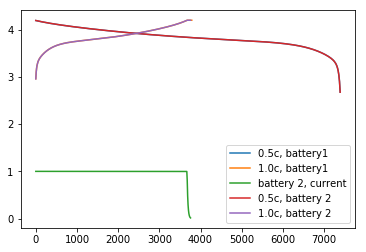

In [12]:
b = []
b.append(spm2.discharge(current=0.5, trim=True))
b.append(spm2.charge(current=1.0, trim=True))
# print(a)
t_exp = [a[0][0], a[1][0]]
v_exp = [a[0][1], a[1][1]]
plt.plot(t_exp[0], v_exp[0], label='0.5c, battery1')
plt.plot(t_exp[1], v_exp[1], label = '1.0c, battery1')
plt.plot(b[1][0], b[1][2], label = 'battery 2, current')
plt.plot(b[0][0], b[0][1], label='0.5c, battery 2')
plt.plot(b[1][0], b[1][1], label='1.0c, battery 2')
plt.legend()

### What about cycling? Or arbitrary charge/discharge patterns?

In [9]:
pwc = spm1.piecewise_current([500,400,600,200,50,700,300,2000], [1.0,-0.5,1.2,-0.75,2.0,0.5,-1.0,1.5])
t_exp = pwc[0]
v_exp = pwc[1]
plt.plot(pwc[0], pwc[1])
plt.plot(pwc[0], pwc[2])

[ 1.00000000e-14  1.00000000e-14  5.15550000e+04  3.05550000e+04
  8.00000000e-05  8.80000000e-05  2.00000000e-06  2.00000000e-06
  3.03150000e+02  1.00000000e+03  8.85000000e+05  7.23600000e+05
  2.60000000e-02  2.10000000e+03  1.00000000e+00  2.33400000e-11
  8.30700000e-12  1.50000000e-06  3.00000000e+01  3.00000000e+01
 -1.00000000e+00  1.00000000e+00  0.00000000e+00  5.00000000e+02
  2.51417672e+04  2.51417672e+04  2.51417672e+04  2.51417672e+04
  2.51417672e+04  2.51417672e+04  2.51417672e+04  2.51417672e+04
  2.51417672e+04  2.51417672e+04  2.51417672e+04  2.51417672e+04
  2.51417672e+04  2.51417672e+04  2.51417672e+04  2.51417672e+04
  2.51417672e+04  2.51417672e+04  2.51417672e+04  2.51417672e+04
  2.51417672e+04  2.51417672e+04  2.51417672e+04  2.51417672e+04
  2.51417672e+04  2.51417672e+04  2.51417672e+04  2.51417672e+04
  2.51417672e+04  2.51417672e+04  2.51417672e+04  2.51417672e+04
  2.73921225e+00  2.73921225e+00  2.73921225e+00  2.73921225e+00
  2.73921225e+00  2.73921

TypeError: list indices must be integers or slices, not tuple

In [6]:
spm2 = SingleParticle(initial_parameters=p1, estimate_parameters=['Rp','kp','lp'])
pwc = spm2.piecewise_current([500,400,600,200,50,700,300,2000], [1.0,-0.5,1.2,-0.75,2.0,0.5,-1.0,1.5])
t_initial = pwc[0]
v_initial = pwc[1]
spm2.fit([500,400,600,200,50,700,300,2000], v_exp, currents=[1.0,-0.5,1.2,-0.75,2.0,0.5,-1.0,1.5], currents_type='piecewise', tol=1e-8, maxiter=1000)


 final_simplex: (array([[1.98518800e-06, 1.20510266e-09, 8.06428498e-05],
       [1.98507214e-06, 1.19270705e-09, 8.06475759e-05],
       [1.98525237e-06, 1.20572710e-09, 8.06406685e-05],
       [1.98542948e-06, 1.21266344e-09, 8.06333374e-05]]), array([4.88384960e-05, 4.88429854e-05, 4.88435458e-05, 4.88440599e-05]))
           fun: 4.883849602029821e-05
       message: 'Optimization terminated successfully.'
          nfev: 144
           nit: 80
        status: 0
       success: True
             x: array([1.98518800e-06, 1.20510266e-09, 8.06428498e-05])

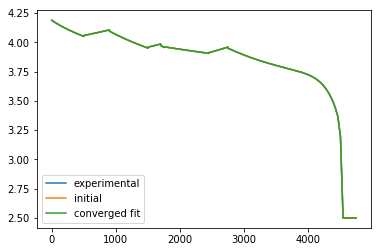

In [7]:
plt.plot(t_exp, v_exp, label='experimental')
plt.plot(t_initial, v_initial, label = 'initial')
pwc = spm2.piecewise_current([500,400,600,200,50,700,300,2000], [1.0,-0.5,1.2,-0.75,2.0,0.5,-1.0,1.5])
plt.plot(pwc[0], pwc[1], label='converged fit')
plt.legend()

In [16]:
error = (spm2.fitted_parameters-true_values[spm2.estimate_inds])/true_values[spm2.estimate_inds]*100
print("Percent error for the estimated parameters:")
print(np.array([key for key in spm2.initial_parameters.keys()])[spm2.estimate_inds])
print(error)

Percent error for the estimated parameters:
['Rp' 'kp' 'lp']
[ -1.46185022 -67.51891959   1.49276063]


## Comments? Questions? Suggestions?

Please feel free to contact me at

### nealde@uw.edu